<div style="text-align:center;">
    <span style="color:green; font-size: 24px;">Fake News Detection</span>
</div>


#### Business Problem : Making it easier for people to know if news online is real or fake 

#### Objective : Building a smart tool that can tell if news articles are true or not, helping people make better choices and stop fake news from spreading.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import string
import regex as re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import autocorrect
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tempfile import mkdtemp
from shutil import rmtree



from sklearn.metrics import accuracy_score
from joblib import Memory

import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [2]:
df_real = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\True.csv\True.csv")

In [3]:
df_real.head()    #first five rows of real data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\Fake.csv\Fake.csv")

In [5]:
df_fake.head()   #first five rows of fake data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_fake["label"] = 0
df_real["label"] = 1   #Labeling the Data

In [7]:
df_fake.head()  

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df_real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### Merging the Data

In [9]:
merged_df = pd.concat([df_fake, df_real])

In [10]:
merged_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [11]:
df = shuffle(merged_df)

In [12]:
df

,title,text,subject,date,label
12797,Thousands of Tunisians protest against Trump's...,TUNIS (Reuters) - Thousands of Tunisians prote...,worldnews,"December 7, 2017",1
15484,OUTRAGEOUS! MEMPHIS VOTES TO DIG UP CONFEDERAT...,THE CLEANSING OF OUR HISTORY CONTINUES What th...,politics,"Jul 10, 2015",0
9467,"Grammar fail, or do Texas Republicans believe ...","AUSTIN, Texas (Reuters) - A Texas-based LGBT a...",politicsNews,"May 19, 2016",1
16365,Catalan government business head resigns over ...,MADRID (Reuters) - The Catalan government s bu...,worldnews,"October 26, 2017",1
10211,Democratic Party workers pore over videos in b...,(Reuters) - From the basement to the third flo...,politicsNews,"March 22, 2016",1
...,...,...,...,...,...
4580,Two White House officials helped give Nunes in...,WASHINGTON (Reuters) - Two White House officia...,politicsNews,"March 30, 2017",1
17115,Egged off: EU summit venue switched after noxi...,BRUSSELS (Reuters) - Toxic fumes from kitchen ...,worldnews,"October 13, 2017",1
11162,OBAMA SIDEKICK VALERIE JARRETT In Hot Water Ov...,Remember when Valerie Jarrett signed with a Ho...,politics,"Apr 11, 2017",0
6921,"Putin says Trump clever, will understand new r...",MOSCOW (Reuters) - U.S. President-elect Donald...,politicsNews,"December 4, 2016",1


## Exploratory Data Analysis

In [13]:
df.shape  #no of rows and columns

(44898, 5)

In [14]:
df.dtypes  #datatypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [15]:
df.info()  #information about the data

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 12797 to 4202
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [16]:
df.describe()  #statistical measures

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [17]:
df.columns  #columns present in the dataset

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

##### Missing values

In [18]:
df.isna().sum() #checking missing values

title      0
text       0
subject    0
date       0
label      0
dtype: int64

##### Duplicates

In [19]:
df.duplicated().sum()  #checking duplicates

209

In [20]:
df.drop_duplicates(inplace=True)   #drop duplicates

In [21]:
df['label'].value_counts()  

label
0    23478
1    21211
Name: count, dtype: int64

In [22]:
df['label'].value_counts(normalize=True)

label
0    0.525364
1    0.474636
Name: proportion, dtype: float64

In [23]:
df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True,errors='coerce')

df['Year'] = df['date'].dt.year            #creating new columns for year and month
df['Month'] = df['date'].dt.month_name()

In [24]:
df['subject'].value_counts()

subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [25]:
df['subject'] = df['subject'].replace('politics', 'politicsNews')

In [26]:
df.columns = df.columns.str.replace('_', ' ').str.title()   #capitalize the first letter in titles

In [27]:
df

,Title,Text,Subject,Date,Label,Year,Month
12797,Thousands of Tunisians protest against Trump's...,TUNIS (Reuters) - Thousands of Tunisians prote...,worldnews,2017-12-07,1,2017.0,December
15484,OUTRAGEOUS! MEMPHIS VOTES TO DIG UP CONFEDERAT...,THE CLEANSING OF OUR HISTORY CONTINUES What th...,politicsNews,2015-07-10,0,2015.0,July
9467,"Grammar fail, or do Texas Republicans believe ...","AUSTIN, Texas (Reuters) - A Texas-based LGBT a...",politicsNews,2016-05-19,1,2016.0,May
16365,Catalan government business head resigns over ...,MADRID (Reuters) - The Catalan government s bu...,worldnews,2017-10-26,1,2017.0,October
10211,Democratic Party workers pore over videos in b...,(Reuters) - From the basement to the third flo...,politicsNews,2016-03-22,1,2016.0,March
...,...,...,...,...,...,...,...
8117,Ted Cruz Repeats Lie About SCOTUS Nominations...,After being embarrassed on live television Sat...,News,2016-02-14,0,2016.0,February
4580,Two White House officials helped give Nunes in...,WASHINGTON (Reuters) - Two White House officia...,politicsNews,2017-03-30,1,2017.0,March
17115,Egged off: EU summit venue switched after noxi...,BRUSSELS (Reuters) - Toxic fumes from kitchen ...,worldnews,2017-10-13,1,2017.0,October
11162,OBAMA SIDEKICK VALERIE JARRETT In Hot Water Ov...,Remember when Valerie Jarrett signed with a Ho...,politicsNews,2017-04-11,0,2017.0,April


In [28]:
df.dtypes

Title              object
Text               object
Subject            object
Date       datetime64[ns]
Label               int64
Year              float64
Month              object
dtype: object

## Data Visualization

### Univariate Analysis

Label
0    23478
1    21211
Name: count, dtype: int64

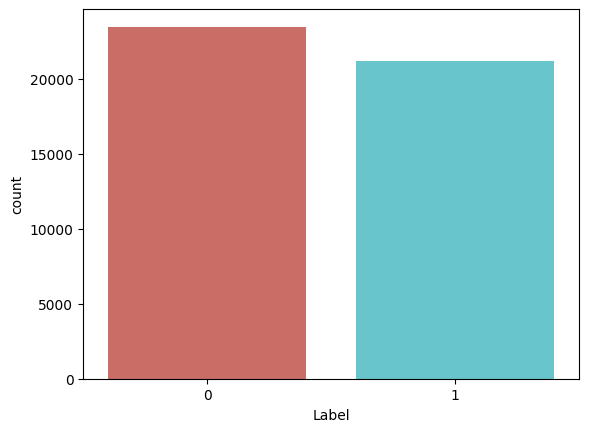

In [29]:
def create_distribution(dataFile):
    return sns.countplot(x='Label', data=dataFile, palette='hls')

create_distribution(df)

df['Label'].value_counts()

<Axes: ylabel='proportion'>

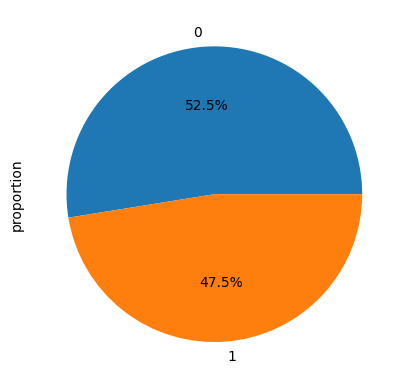

In [30]:
df['Label'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

* 52% is fake news and 47 % is real news

In [31]:
df

,Title,Text,Subject,Date,Label,Year,Month
12797,Thousands of Tunisians protest against Trump's...,TUNIS (Reuters) - Thousands of Tunisians prote...,worldnews,2017-12-07,1,2017.0,December
15484,OUTRAGEOUS! MEMPHIS VOTES TO DIG UP CONFEDERAT...,THE CLEANSING OF OUR HISTORY CONTINUES What th...,politicsNews,2015-07-10,0,2015.0,July
9467,"Grammar fail, or do Texas Republicans believe ...","AUSTIN, Texas (Reuters) - A Texas-based LGBT a...",politicsNews,2016-05-19,1,2016.0,May
16365,Catalan government business head resigns over ...,MADRID (Reuters) - The Catalan government s bu...,worldnews,2017-10-26,1,2017.0,October
10211,Democratic Party workers pore over videos in b...,(Reuters) - From the basement to the third flo...,politicsNews,2016-03-22,1,2016.0,March
...,...,...,...,...,...,...,...
8117,Ted Cruz Repeats Lie About SCOTUS Nominations...,After being embarrassed on live television Sat...,News,2016-02-14,0,2016.0,February
4580,Two White House officials helped give Nunes in...,WASHINGTON (Reuters) - Two White House officia...,politicsNews,2017-03-30,1,2017.0,March
17115,Egged off: EU summit venue switched after noxi...,BRUSSELS (Reuters) - Toxic fumes from kitchen ...,worldnews,2017-10-13,1,2017.0,October
11162,OBAMA SIDEKICK VALERIE JARRETT In Hot Water Ov...,Remember when Valerie Jarrett signed with a Ho...,politicsNews,2017-04-11,0,2017.0,April


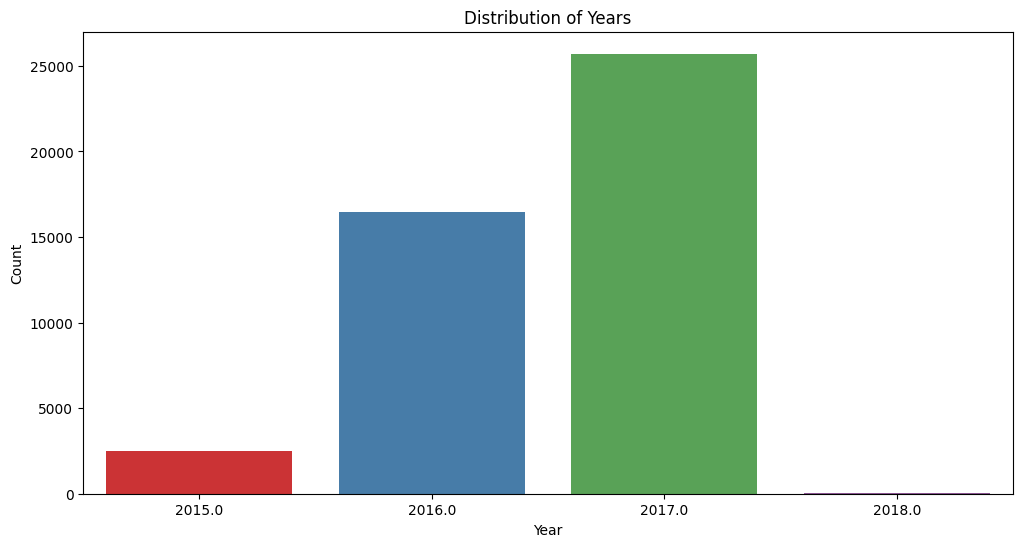

In [32]:
year_counts = df['Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', data=year_counts, palette='Set1')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


* There are more data in the year 2017 

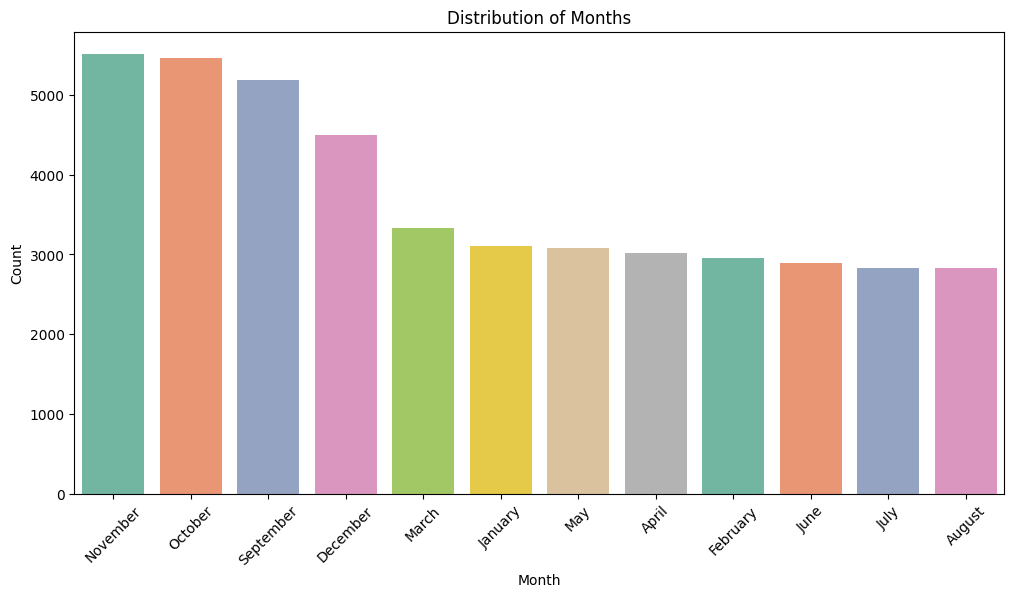

In [33]:
month_counts = df['Month'].value_counts().reset_index()
month_counts.columns = ['Month', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Count', data=month_counts, order=month_counts['Month'], palette='Set2')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


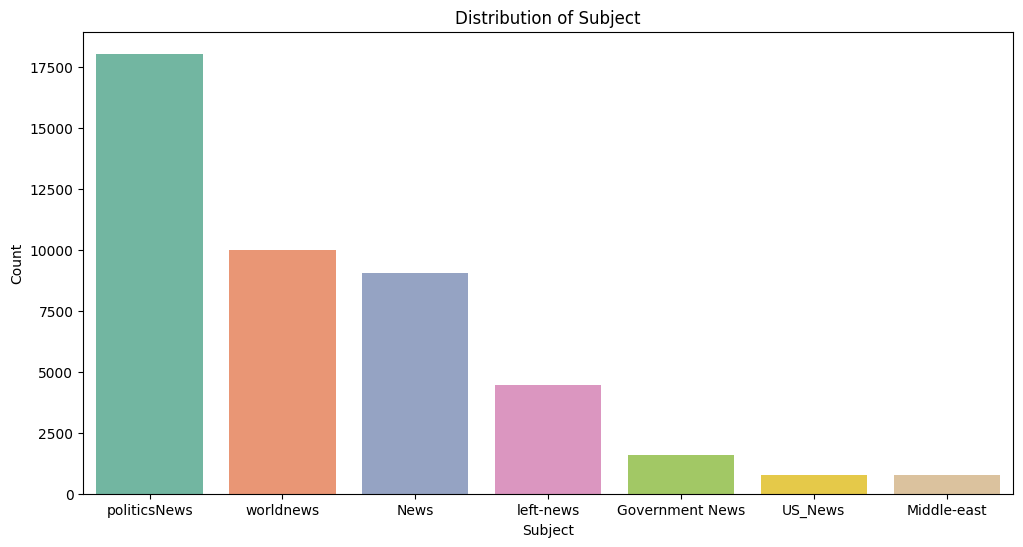

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject', data=df, order=df['Subject'].value_counts().index, palette='Set2')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* There are more data in our dataset related to politicsnews

### Bivariate Analysis

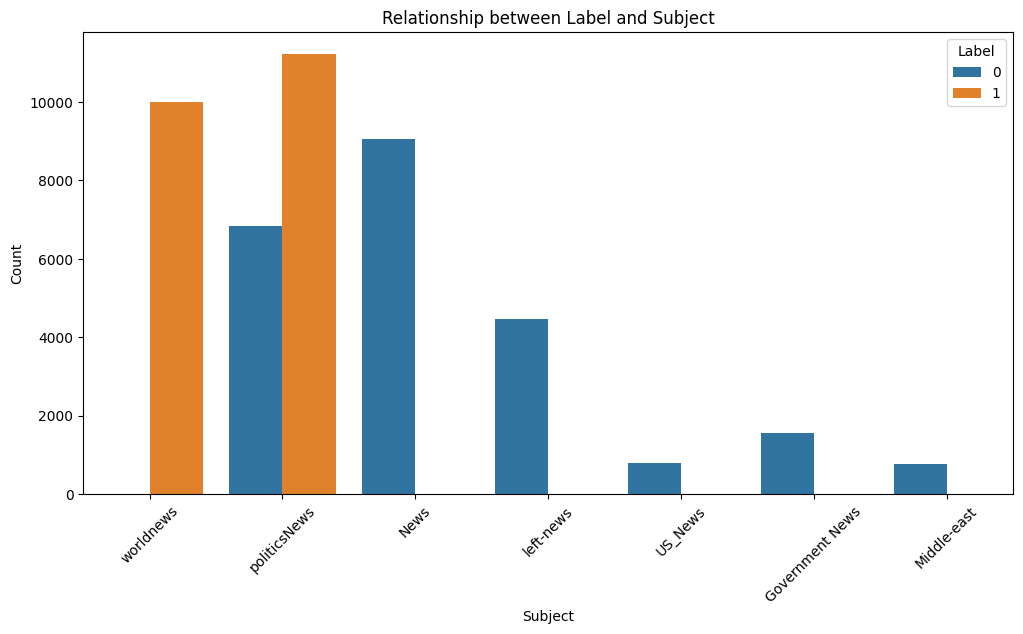

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject', hue='Label', data=df)
plt.title('Relationship between Label and Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

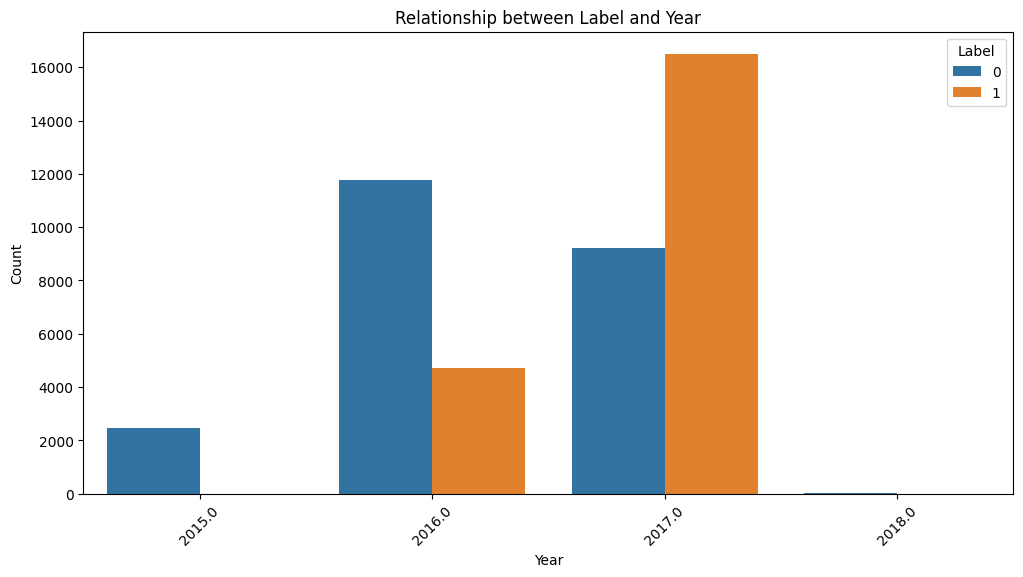

In [36]:
df_agg = df.groupby(['Year', 'Label']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', hue='Label', data=df_agg)
plt.title('Relationship between Label and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()

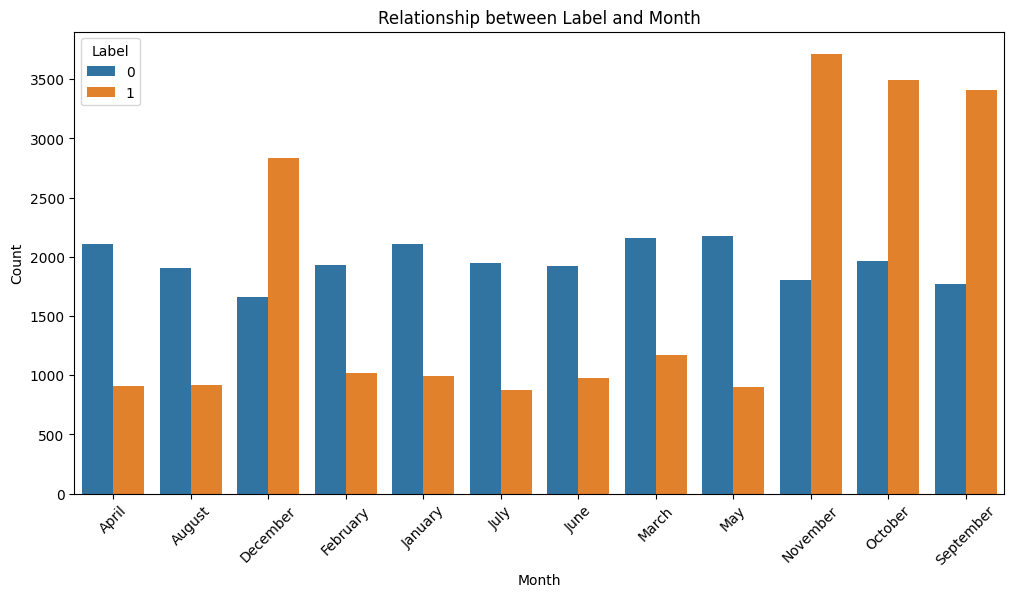

In [37]:
df_agg = df.groupby(['Month', 'Label']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Count', hue='Label', data=df_agg)
plt.title('Relationship between Label and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()

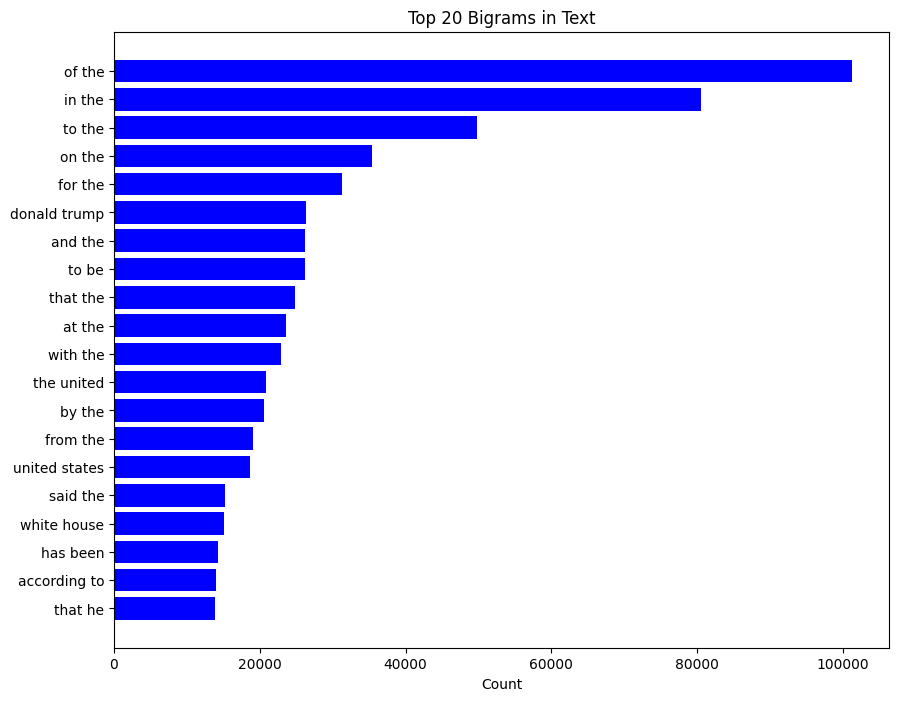

In [38]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['Text'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 8))
plt.barh(df_bigrams['bigram'], df_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Text')
plt.gca().invert_yaxis()
plt.show()


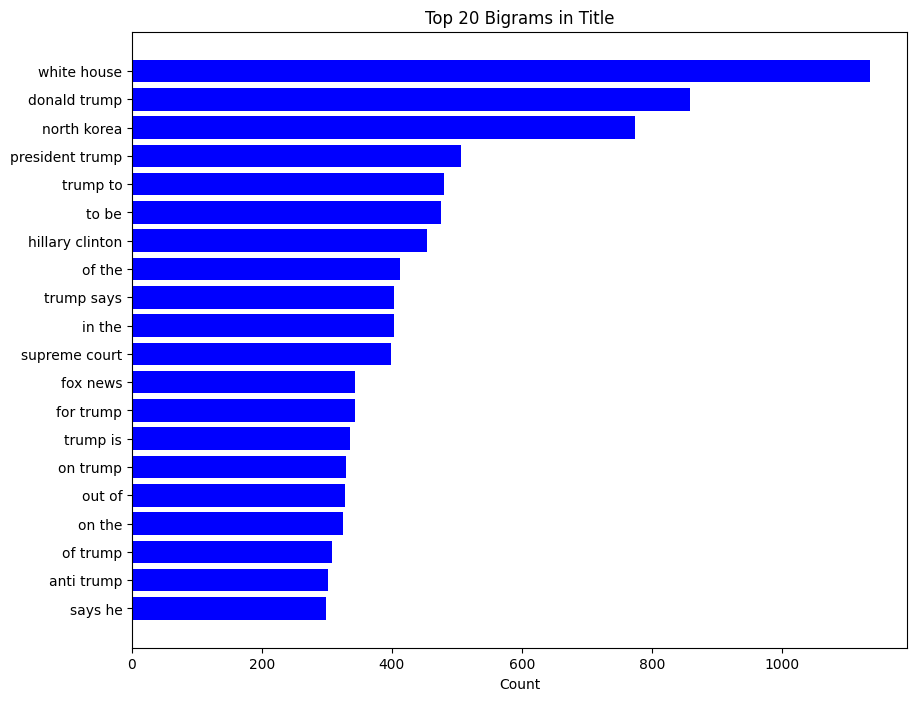

In [39]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['Title'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 8))
plt.barh(df_bigrams['bigram'], df_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Title')
plt.gca().invert_yaxis()
plt.show()


### Sentiment Analysis

In [40]:
sia = SentimentIntensityAnalyzer()
res = {}

for i, row in tqdm(df.iterrows(), total=len(df), desc="Sentiment Analysis"):
    text = row['Text']
    my_id = row['Title'] 
    res[my_id] = sia.polarity_scores(text)

Sentiment Analysis: 100%|██████████| 44689/44689 [08:23<00:00, 88.83it/s] 


In [41]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Title'})
vaders = vaders.merge(df, how='left')

In [42]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

vaders['sentiment'] = vaders['compound'].apply(lambda val: polarity_score(val))

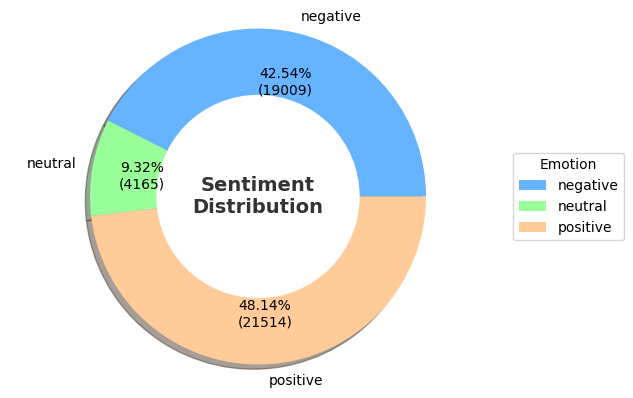

In [43]:
unique_emotion = vaders['sentiment'].unique()

explode = [0] * len(unique_emotion)

emotion_counts = vaders.groupby("sentiment").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99']  

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=emotion_counts, 
    labels=emotion_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(emotion_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,  
    shadow=True
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(emotion_counts.index, title="Emotion", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

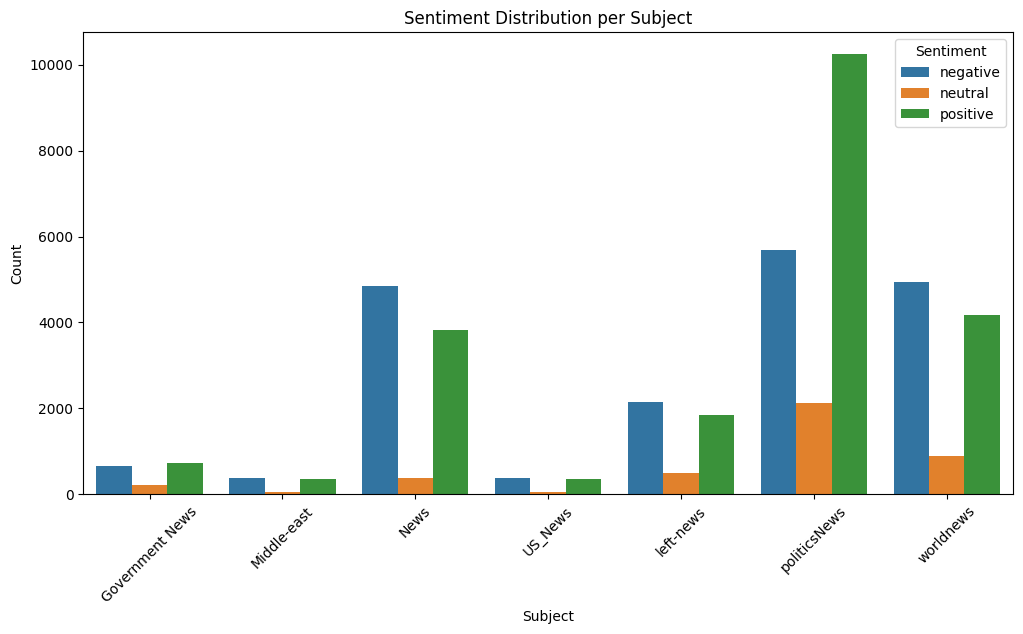

In [44]:
sentiment_counts = vaders.groupby(['Subject', 'sentiment'])['sentiment'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='count', hue='sentiment', data=sentiment_counts)

plt.title('Sentiment Distribution per Subject')
plt.xlabel('Subject')
plt.ylabel('Count')

plt.legend(title='Sentiment')

plt.xticks(rotation=45)

plt.show()


## Step 1 - Identify Input and Output

In [45]:
X = df['Text']
y = df['Label']

## Step2 - Splitting the Data into train and test

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

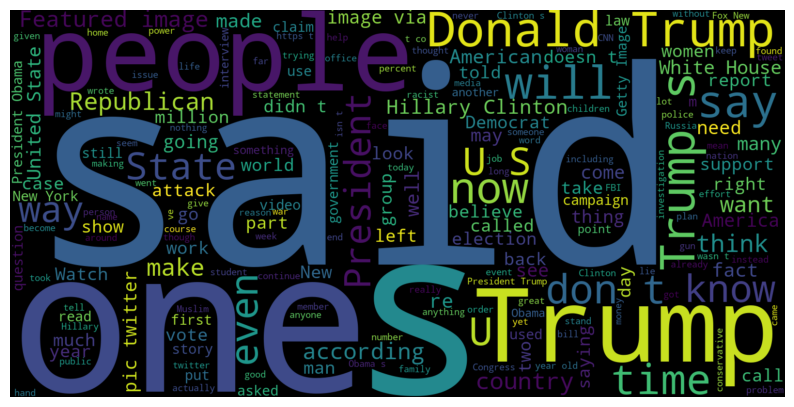

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(data))

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Display the word cloud for Fake News
display_wordcloud(X_train[y_train ==0])


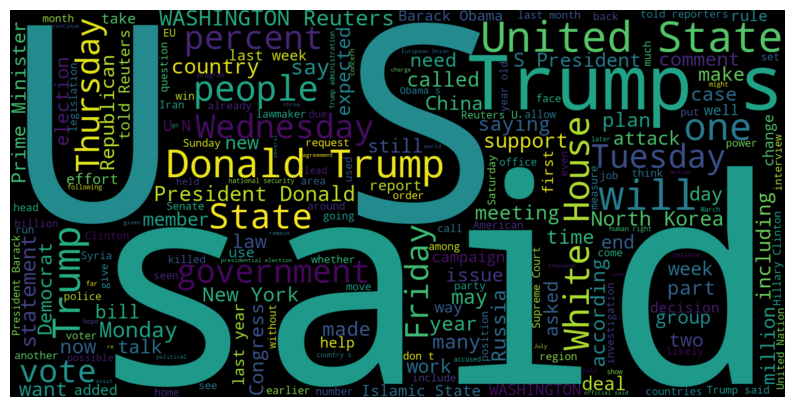

In [49]:
# Display the wordcloud for Real News

display_wordcloud(X_train[y_train==1])

In [50]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [51]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CHARISHMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## EDA of Data Preprocessing 

In [52]:
def eda(data,column):
    count = 0
    count = data[column].apply(lambda x: count + emoji.emoji_count(x)).sum()   #emoji count in the data
    lower = data[column].str.islower().sum()
    url = data[column].apply(lambda x: True if re.search(r'www.\S+ | https?://\S+',x) else False).sum()
    tags = data[column].apply(lambda x: True if re.search(r'<[^>]+>',x)else False).sum()
    marks = data[column].apply(lambda x: True if re.search(r'[^a-zA-Z0-9]',x)else False).sum()
    digits = data[column].apply(lambda x: True if re.search(r'[0-9]',x)else False).sum()
    return pd.Series({'Emoji count':count,'lower case':lower,'urls':url,'Html tags':tags,'Punctuation marks':marks,'Digits':digits})

In [53]:
eda(df,'Text')

Emoji count              4
lower case               9
urls                  2738
Html tags               87
Punctuation marks    44689
Digits               36068
dtype: int64

## Data Preprocessing

In [54]:
def clean(doc): # doc is a string of text
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")

    doc = emoji.demojize(doc).replace(':', ' ')
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(preprocessor=clean)

In [56]:
import joblib
from joblib import Memory

import os

In [57]:
import os
os.getcwd()

'C:\\Users\\CHARISHMA\\Machine Learning'

In [58]:
%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: total: 7min 25s
Wall time: 8min 32s


In [59]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 1min 51s
Wall time: 2min 6s


In [60]:
X_train

5126     WASHINGTON (Reuters) - U.S. President Donald T...
11455    Matt Lauer, of the failing Today Show had an e...
7611     (Reuters) - U.S. Senator Chuck Grassley asked ...
4835     WASHINGTON (Reuters) - European Foreign policy...
18351    BUCHAREST (Reuters) - Thousands of state worke...
                               ...                        
3890     Ah, the ultimate Trump fangirl, with the excep...
18236    LONDON (Reuters) - Spanish stocks were set for...
7713     Mitt Romney tried to confront Donald Trump hea...
17036    BRUSSELS (Reuters) - French President Emmanuel...
2705     WASHINGTON (Reuters) - After Republicans’ effo...
Name: Text, Length: 35751, dtype: object

In [61]:
X_train_clean

5126     washington reuters u president donald trump ac...
11455    matt lauer failing today show exclusive interv...
7611     reuters u senator chuck grassley asked departm...
4835     washington reuters european foreign policy chi...
18351    bucharest reuters thousand state worker protes...
                               ...                        
3890     ah ultimate trump fangirl exception sarah pali...
18236    london reuters spanish stock set biggest day g...
7713     mitt romney tried confront donald trump headon...
17036    brussels reuters french president emmanuel mac...
2705     washington reuters republican ’ effort pas hea...
Name: Text, Length: 35751, dtype: object

## Model Building and Evaluation

In [64]:
# Define a memory object to cache intermediate results
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=0)


pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', BernoulliNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'xgboost': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', XGBClassifier())
    ], memory=memory),
}

param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 2000], 
            'classifier__alpha': [1]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 2000],
            'classifier__max_depth': [None, 5]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 2000], 
            'classifier__C': [0.1, 1], 
            'classifier__penalty': ['l2'],
            'classifier__solver': ['liblinear'],
            'classifier__class_weight': [None, 'balanced']
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 2000], 
            'classifier__n_estimators': [50, 100]
        }
    ],
    'xgboost': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 2000], 
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1, 0.3],
            'classifier__n_estimators': [100, 200],
            'classifier__objective': ['binary:logistic']
        }
    ]
}
# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    print('Score on Train Data:', grid_search.score(X_train_clean,y_train))
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

rmtree(cachedir)

********** naive_bayes **********
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 2min 12s
Wall time: 2min 33s
Score on Train Data: 0.9661268216273671
Score on Test Data:  0.9638621615573953
********** decision_tree **********
Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 3min 33s
Wall time: 3min 51s
Score on Train Data: 0.9956644569382674
Score on Test Data:  0.9955247258894607
********** logistic_regression **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 5min 45s
Wall time: 7min 24s
Score on Train Data: 0.9991328913876535
Score on Test Data:  0.9950771984784068
********** random_forest **********
Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 13min 5s
Wall time: 19min 26s
Score on Train Data: 0.9999720287544405
Score on Test Data:  0.9977623629447304
********** xgboost **********
Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: t

In [65]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=C:\Users\CHARIS~1\AppData\Local\Temp\tmpxdl8e_c3\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', BernoulliNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=C:\Users\CHARIS~1\AppData\Local\Temp\tmpxdl8e_c3\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier(max_depth=5))])

logistic_regression
Pipeline(memory=Memory(location=C:\Users\CHARIS~1\AppData\Local\Temp\tmpxdl8e_c3\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    solver='liblinear'))])

random_forest
Pipeline(memory=Memory(location=C:\Users\CHARIS~1\AppData\Local\Temp\tmpxdl8e_c3\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
          

In [66]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'C:\\Users\\CHARISHMA\\Machine Learning\\Fake News Detection\\{name}.pkl')
    model = joblib.load(f'C:\\Users\\CHARISHMA\\Machine Learning\\Fake News Detection\\{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (accuracy)", accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'C:\\Users\\CHARISHMA\\Machine Learning\\Fake News Detection\\{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 828 ms
Wall time: 1.65 s
Test Score (accuracy) 0.9638621615573953
Model Size: 2297771 Bytes
********** decision_tree **********
CPU times: total: 828 ms
Wall time: 1.67 s
Test Score (accuracy) 0.9955247258894607
Model Size: 2268765 Bytes
********** logistic_regression **********
CPU times: total: 828 ms
Wall time: 1.84 s
Test Score (accuracy) 0.9950771984784068
Model Size: 2302858 Bytes
********** random_forest **********
CPU times: total: 797 ms
Wall time: 2.2 s
Test Score (accuracy) 0.9977623629447304
Model Size: 32021941 Bytes
********** xgboost **********
CPU times: total: 1.45 s
Wall time: 1.78 s
Test Score (accuracy) 0.9977623629447304
Model Size: 2481651 Bytes


## Creating DataFrame for accuracy comparison

In [70]:
data = {
    'Algorithm': ['naive_bayes', 'decision_tree', 'logistic_regression', 'random_forest', 'xgboost'],
    'CPU Time (total)': [828, 828, 828, 797, 1450],
    'Wall Time': [1.65, 1.67, 1.84, 2.2, 1.78],
    'Test Score (accuracy)': [0.9638621615573953, 0.9955247258894607, 0.9950771984784068, 0.9977623629447304, 0.9977623629447304],
    'Model Size (Bytes)': [2297771, 2268765, 2302858, 32021941, 2481651]
}

df = pd.DataFrame(data)

df

,Algorithm,CPU Time (total),Wall Time,Test Score (accuracy),Model Size (Bytes)
0,naive_bayes,828,1.65,0.963862,2297771
1,decision_tree,828,1.67,0.995525,2268765
2,logistic_regression,828,1.84,0.995077,2302858
3,random_forest,797,2.20,0.997762,32021941
4,xgboost,1450,1.78,0.997762,2481651
